intercept: 2.4803670915057623
slope: [9.71409219]
Predicted score for 7.56 hours of studying: [75.91890407]


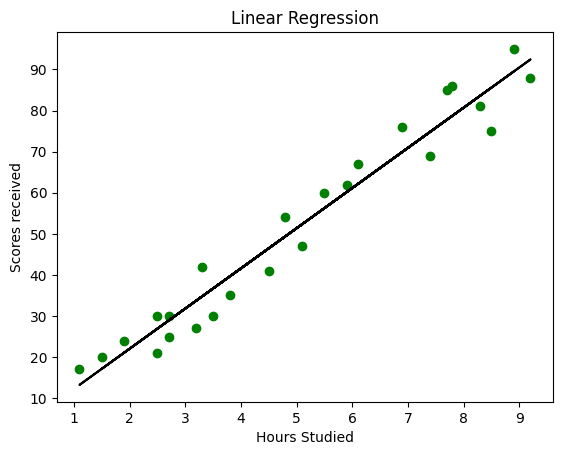

In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('https://raw.githubusercontent.com/gheniabla/datasets/master/score.csv',
                 quotechar='"',
                 quoting=csv.QUOTE_ALL)

df.head() # produce a header from the first data row

# LinearRegression will expect an array of shape (n, 1)
# for the "Training data"
X = df['Hours'].values[:,np.newaxis]
# target data is array of shape (n,)
y = df['Scores'].values

model = LinearRegression()
model.fit(X, y)

#plot data
plt.scatter(X, y,color='g')
plt.plot(X, model.predict(X),color='k')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,shuffle=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
#y_pred = model.predict(x)
y_pred = np.clip(y_pred, None, 100)


#predictions = model.predict(X_test)
#plt.scatter(y_test, predictions)

#add x and y label as well as graph title
plt.title('Linear Regression')
plt.xlabel('Hours Studied')
plt.ylabel('Scores received')
#x.legend(loc='center right', bbox_to_anchor=(1.10, 0.5))


print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

#get user_inp for how many hours studied to use for the prediction or use preset val
#hours_studied = float(input('Enter number of hours you studied: \n'))
hours_studied = 7.56

# Model Prediction on Test Data and use predict funtion call
hours_studied = np.array([hours_studied]).reshape(-1,1)
predicted_score = model.predict(hours_studied)
predicted_score = np.clip(predicted_score, None, 100)
print(f"Predicted score for 7.56 hours of studying: {predicted_score}")

plt.show()